<a href="https://colab.research.google.com/github/Ahmed-Magdi1/Lab2_Machine_Vision/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB_2_Question_2**

### **1) Take a picture of your face and save it as (yourname0.jpg) =𝑓(𝑢,𝑣)**

In [131]:
# Important libraries
import  cv2 as cv  #Define computer vision library
import numpy as np #Define numpy library
from matplotlib import pyplot as plt #Define matplotlib library

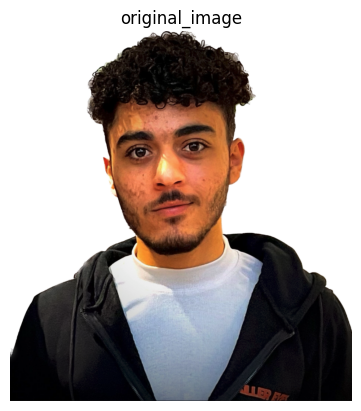

In [132]:
image = cv.imread('/content/ahmed.png') #Read the image
original_image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert the image from BGR to RGB
plt.imshow(original_image) #Show the image
plt.axis('off')  # Disable the axises
plt.title('original_image')  # Set the title
plt.show()  # Show the plot
cv.imwrite('ahmed0.jpg', image) # Save the image with name 'ahmed0.jpg'
image_gray = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)


### **2) Create a set of noisy images by corrupting an image with**

### (a) Additive Gaussian noise of five different severity levels

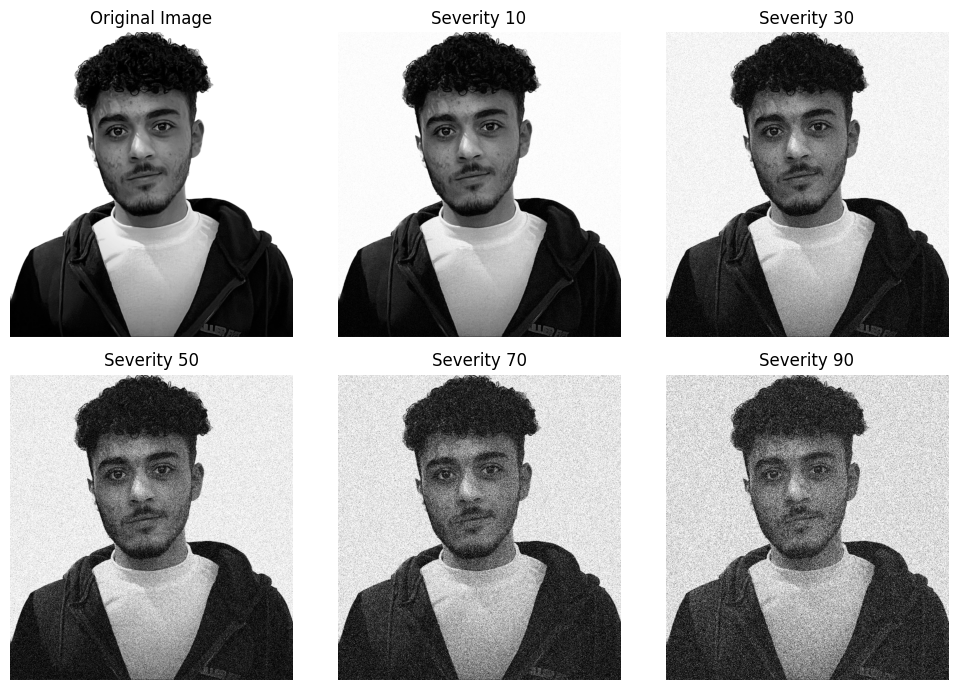

In [133]:
# Define severity levels (standard deviations)
severity_levels = [10, 30, 50, 70, 90]

# Create a 3x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display each noisy image in the grid
for i, severity in enumerate(severity_levels):
    row = (i + 1) // 3  # Calculate the row
    col = (i + 1) % 3   # Calculate the column

    # Generate Gaussian noise with the specified severity
    noise = np.random.normal(0, severity, image_gray.shape).astype(np.int16)

    # Add noise to the grayscale image
    noisy_image = image_gray.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Display the noisy image in the calculated position
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Severity {severity}')
    axes[row, col].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()

### (b) Multiplicative Gaussian noise of five different severity levels

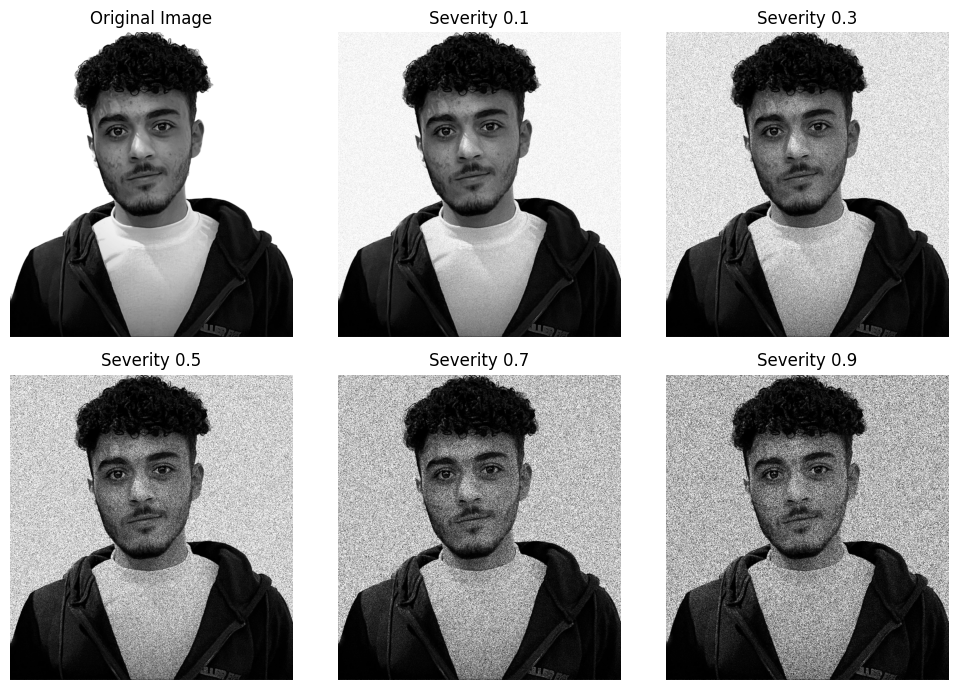

In [134]:
# Define severity levels for Multiplicative Gaussian noise
severity_levels = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a 2x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display each noisy image in the grid
for i, severity in enumerate(severity_levels):
    row = (i + 1) // 3  # Calculate the row (0 for first row, 1 for second)
    col = (i + 1) % 3   # Calculate the column within the row

    # Generate Multiplicative Gaussian noise with the specified severity
    noise = np.random.normal(1, severity, image_gray.shape).astype(np.float32)

    # Apply multiplicative noise to the grayscale image
    noisy_image = image_gray.astype(np.float32) * noise

    # Clip to ensure pixel values are within the 0-255 range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Display the noisy image in the calculated position
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Severity {severity}')
    axes[row, col].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()

### (c) Impulse noise of five different severity levels

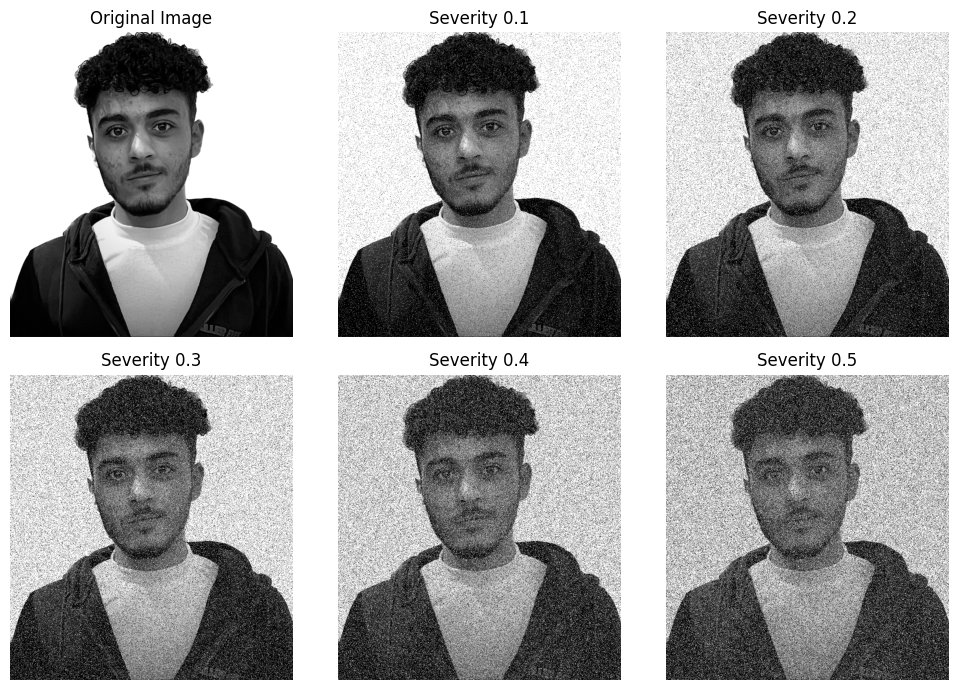

In [135]:
# Define severity levels for Impulse Noise (probabilities)
severity_levels = [0.1, 0.2, 0.3, 0.4, 0.5]  # Increasing severity levels as probabilities

# Create a 2x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display each noisy image in the grid
for i, severity in enumerate(severity_levels):
    row = (i + 1) // 3  # Calculate the row (0 for first row, 1 for second)
    col = (i + 1) % 3   # Calculate the column within the row

    # Generate Impulse Noise on a copy of the grayscale image
    noisy_image = image_gray.copy()
    num_salt = int(severity * image_gray.size * 0.5)  # Half of the noisy pixels for "salt"
    num_pepper = int(severity * image_gray.size * 0.5)  # Half for "pepper"

    # Apply "Salt" noise (setting some pixels to 255 for white)
    coords = np.random.choice(image_gray.shape[0] * image_gray.shape[1], num_salt, replace=False)
    salt_coords = (coords // image_gray.shape[1], coords % image_gray.shape[1])
    noisy_image[salt_coords] = 255

    # Apply "Pepper" noise (setting some pixels to 0 for black)
    coords = np.random.choice(image_gray.shape[0] * image_gray.shape[1], num_pepper, replace=False)
    pepper_coords = (coords // image_gray.shape[1], coords % image_gray.shape[1])
    noisy_image[pepper_coords] = 0

    # Display the noisy image in the calculated position
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Severity {severity}')
    axes[row, col].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()